In [87]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [88]:
df = pd.read_csv('../data/datatran_2016-2017.csv', dtype={'br_str': str})
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(180991, 32)

In [89]:
df.target.value_counts()

1    106534
0     64166
2     10291
Name: target, dtype: int64

In [90]:
class0 = df[df.target==0].sample(10291)
class1 = df[df.target==1].sample(10291)
class2 = df[df.target==2]

df2 = shuffle(pd.concat([class0, class1, class2]))

In [91]:
dd = df2[['weekday', 'uf', 'br_str', 'km_int', 'accident_cause_simplified', 'accident_type', 
        'moment_of_day', 'climate', 'road_layout', 'mes', 'ano', 'hora',  'dia', 'target']]
dd = dd.dropna()
dd.shape

(30873, 14)

In [92]:
dd.target.value_counts()

2    10291
1    10291
0    10291
Name: target, dtype: int64

In [93]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
model = LogisticRegression()

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1., 1.5, 2., 3.5 ],
    'class_weight': ['balanced', None],
    'max_iter': [100, 200, 500],
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

In [96]:
best_clf

LogisticRegression(C=3.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
joblib.dump(best_clf, '../model/modelo_v0_logistic_regression.pkl') 

['../model/modelo_v0_logistic_regression.pkl']

In [98]:
y_pred = best_clf.predict(X_test)

Confusion matrix, without normalization
[[1480  450  168]
 [ 827  855  388]
 [ 424  350 1233]]


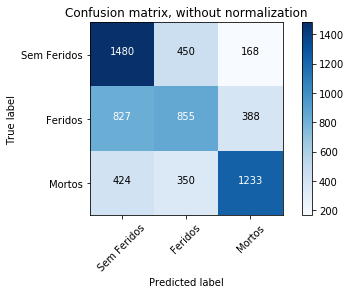

In [99]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [100]:
accuracy_score(y_test, y_pred)

0.5778137651821862

In [101]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.54      0.71      0.61      2098
          1       0.52      0.41      0.46      2070
          2       0.69      0.61      0.65      2007

avg / total       0.58      0.58      0.57      6175

